In [524]:
# Debuger
# ==============================================================================
from icecream import ic
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
# Configuración warnings
# ==============================================================================
import warnings

#ML - LIBRARIES
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals
from sklearn.model_selection import train_test_split

In [525]:
# Descarga de datos
# ==============================================================================
datos = pd.read_csv("./data/time_series_covid19_confirmed_global.csv")
#datos = pd.read_csv("./data/time_series_covid19_recovered_global.csv")
#datos = pd.read_csv("./data/time_series_covid19_deaths_global.csv")
datos.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020,12/18/2020,12/19/2020,12/20/2020
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644


In [526]:
print(datos.info())
print(datos.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 338 entries, Province/State to 12/20/2020
dtypes: float64(2), int64(334), object(2)
memory usage: 715.7+ KB
None
              Lat        Long   1/22/2020   1/23/2020   1/24/2020   1/25/2020  \
count  270.000000  270.000000  271.000000  271.000000  271.000000  271.000000   
mean    20.817839   23.439277    2.047970    2.413284    3.472325    5.291513   
std     25.171460   72.529836   27.026899   27.125204   33.769345   46.999290   
min    -51.796300 -172.104600    0.000000    0.000000    0.000000    0.000000   
25%      6.424864  -18.093125    0.000000    0.000000    0.000000    0.000000   
50%     22.041450   20.972650    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   83.380449    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

         1/26/2020    1/27/2020    1/28/2020    1/29/2020  ...    12/11/2020

In [527]:
#dejar solo _datos_ x _fechas_
datos = datos.drop(['Province/State','Country/Region','Lat','Long'], axis = 1)

#print(datos.head())
datosMundo = []

#Sumar todos los valores por fecha para sacar un modelo
for column in datos:
    datosMundo.append(sum(datos[column]))
datosMundo


[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84123,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146879,
 157952,
 169222,
 184032,
 199976,
 219535,
 246584,
 277361,
 309363,
 344194,
 387045,
 428205,
 479223,
 542053,
 607114,
 674360,
 733612,
 798890,
 875739,
 952172,
 1033388,
 1116618,
 1175629,
 1246549,
 1318482,
 1388956,
 1473309,
 1558977,
 1643587,
 1718073,
 1837439,
 1907058,
 1990793,
 2072667,
 2169593,
 2257225,
 2334507,
 2410704,
 2485347,
 2561192,
 2642885,
 2726775,
 2812325,
 2895703,
 2967633,
 3037310,
 3112818,
 3191303,
 3275136,
 3362854,
 3442433,
 3518905,
 3595904,
 3676385,
 3766928,
 3855986,
 3946360,
 4031230,
 4106395,
 4183162,
 4267380,
 4352926

In [528]:

fechasDatosMundo = datos.columns.values
fechasDatosMundo

array(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020',
       '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020', '2/10/2020',
       '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020', '2/15/2020',
       '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020', '2/20/2020',
       '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020', '2/25/2020',
       '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020', '3/1/2020',
       '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020',
       '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020', '3/11/2020',
       '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020',
       '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020',
       '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020', '3/26/2020',
       '3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020', '3/31/2020',
       '4/

In [529]:
#creamos un df con el numero de casos diarios desde el 22/1/2020 - 20/12/2020
datosGlobales = pd.DataFrame(list(zip(fechasDatosMundo, datosMundo)),columns=['fecha','casos'])
datosGlobales

,fecha,casos
0,1/22/2020,555
1,1/23/2020,654
2,1/24/2020,941
3,1/25/2020,1434
4,1/26/2020,2118
...,...,...
329,12/16/2020,74219546
330,12/17/2020,74955161
331,12/18/2020,75672814
332,12/19/2020,76289042


In [530]:
datosGlobales['fecha'] = pd.to_datetime(datosGlobales['fecha'], format='%m/%d/%Y', errors = 'ignore')
datosGlobales = datosGlobales.set_index('fecha')
datosGlobales = datosGlobales.rename(columns={'casos': 'y'})
datosGlobales = datosGlobales.asfreq('D')
datosGlobales = datosGlobales['y']
datosGlobales = datosGlobales.sort_index()

In [531]:
# Verificar que un índice temporal está completo
# ==============================================================================
(datosGlobales.index == pd.date_range(start   = datosGlobales.index.min(),
                                        end   = datosGlobales.index.max(),
                                        freq  = datosGlobales.index.freq)).all()

True

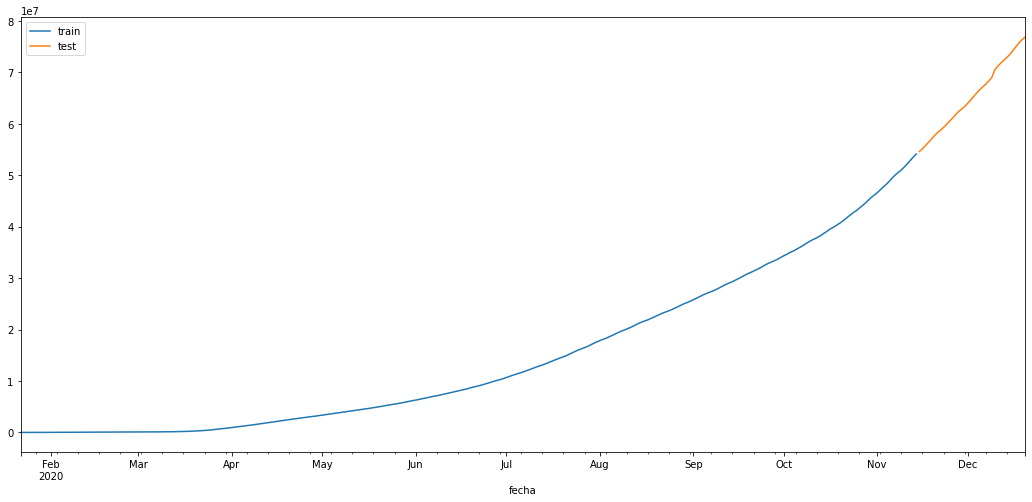

In [532]:
# Separación datos train-test
# ==============================================================================
steps = 36
datos_train = datosGlobales[:-steps]
datos_test  = datosGlobales[-steps:]
fig, ax = plt.subplots(figsize=(18, 8))

datos_train.plot(ax=ax, label = 'train')
datos_test.plot(ax=ax, label = 'test')

ax.legend();

In [533]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster_rf = ForecasterAutoregMultiOutput(
                    regressor = Lasso(random_state=123),
                    steps     = 36,
                    lags      = 8 # Este valor será remplazado en el grid search
                )

param_grid = {'alpha': np.logspace(-5, 5, 10)}

lags_grid = [5, 12, 20]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid = lags_grid,
                        steps       = 36,
                        method      = 'cv',
                        metric      = 'mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                    )

2021-11-30 00:30:59,531 root       INFO  Number of models compared: 30
loop lags_grid:   0%|          | 0/3 [00:00<?, ?it/s]/home/dyyysof/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.506e+10, tolerance: 2.351e+10
  model = cd_fast.enet_coordinate_descent(
/home/dyyysof/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.454e+10, tolerance: 2.452e+10
  model = cd_fast.enet_coordinate_descent(
/home/dyyysof/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want

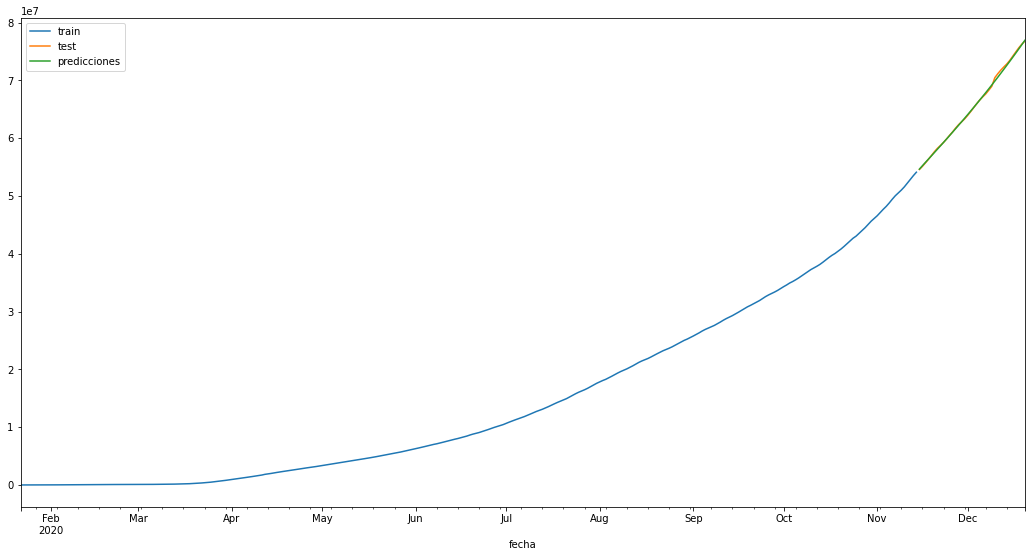

In [538]:
# Predicciones  F
# ==============================================================================
predicciones = forecaster_rf.predict()
# Se añade el índice a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 9))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [537]:
# Error
# ==============================================================================
error_mse = mean_squared_error(y_true = datos_test, y_pred = predicciones)
print(f"Error de test (mse) {error_mse}")

Error de test (mse) 47295530075.983986
